# Data Cleaning with Pandas

In [78]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# load/ import data
df = pd.read_csv("dataset/property_data.csv")

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
# cek missing value dari pandas
df.isnull().sum()

# memberi tau kita di setiap kolom ada berapa missing value

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [5]:
# cek tipe data
df.info()

# kolom yang tipe datanya tidak sesuai ekspektasi bisa kita bersihkan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [6]:
# ubah tipe data
# df['NUM_BEDROOMS'] = pd.to_numeric(df['NUM_BEDROOMS'])

# karena ketemu error, kita tau kalau ada yang datanya bukan angka di kolom yang harusnya angka semua

In [7]:
# non-standard missing values
vals = ['--','-','na','n/a','_']
# buat pandas ubah value2 tersebut jadi NaN saat import
df = pd.read_csv("dataset/property_data.csv", na_values=vals)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
# cek ulang tipe data per kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [9]:
# catch value yang bukan angka (atau tipe data yg diinginkan) dan ubah jadi NaN
index = 0
for row in df['NUM_BATH']:
    # print(row)
    try:
        # coba ubah jadi tipe angka
        float(row)
    except ValueError:
        # print(row, "yang value error")
        df.loc[index, 'NUM_BATH'] = np.NAN
    index = index + 1

In [10]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [11]:
# untuk kolom OWN_OCCUPIED, value selain Y atau N kita hapus, kita replace dengan NaN
index = 0
for row in df['OWN_OCCUPIED']:
    if (row == 'Y' or row == 'N'):
        pass
    else:
        df.loc[index, 'OWN_OCCUPIED'] = np.NAN
    index = index + 1

In [12]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      7 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [14]:
# ubah tipe data kolom sesuai ekspektasi tipe data
df['NUM_BATH'] = pd.to_numeric(df['NUM_BATH'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      7 non-null      float64
 6   SQ_FT         7 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [16]:
# cek lagi ada berapa missing values
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        2
SQ_FT           2
dtype: int64

kita sudah ubah value yang invalid, menjadi missing value yang standard NaN (np.NAN)

kita perlu handle missing value nya - mau dihapus atau diisi

In [17]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [18]:
# contoh drop data yang ad missing value
# by row, sebaris data dihapus kalau salah satu value nya NaN
df.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0


In [19]:
# by column, se kolom data dihapus kalau salah satu value nya NaN
df.dropna(axis=1)

,ST_NAME
0,PUTNAM
1,LEXINGTON
2,LEXINGTON
3,BERKELEY
4,BERKELEY
5,BERKELEY
6,WASHINGTON
7,TREMONT
8,TREMONT


In [20]:
# fillna, kita bisa isi value yang NaN secara otomatis
df.fillna("kosong") # tidak bisa, tiap kolom malah jadi tercampur lagi tipe data nya, tidak sesuai

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,kosong
2,100003000.0,kosong,LEXINGTON,N,kosong,1.0,850.0
3,100004000.0,201.0,BERKELEY,kosong,1.0,kosong,700.0
4,kosong,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,kosong,1.0,800.0
6,100007000.0,kosong,WASHINGTON,kosong,2.0,kosong,950.0
7,100008000.0,213.0,TREMONT,Y,kosong,1.0,kosong
8,100009000.0,215.0,TREMONT,Y,kosong,2.0,1800.0


In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [22]:
# fillna per kolom
# kolom PID kita bisa lihat patternnya adalah angka urut
df.loc[4, 'PID'] = 100005000 # bisa tapi manual sekali

In [23]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [24]:
# reset dulu, biar bisa contohin yg cara berikut
df.loc[4, 'PID'] = np.NAN
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [25]:
# kita bisa buat loop untuk isi value di kolom PID, menjadi nilai value baris sebelumnya + 1000
index = 0
for row in df['PID']:
    if (np.isnan(row) and index > 0):        
        df.loc[index, 'PID'] = df.loc[index-1, 'PID'] + 1000
    index = index + 1

In [26]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [27]:
# untuk ST_NUM kita isi dengan satu angka standar
df['ST_NUM'].fillna(200, inplace=True)

In [28]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,200.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [29]:
# untuk OWN_OCCUPIED, kita tambahkan "U" untuk tidak diketahui
df['OWN_OCCUPIED'].fillna("U", inplace=True)

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,NaN,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2.0,1800.0


In [31]:
# untuk angka yang value nya bisa di generalisir - mean, median, mode kita bisa fillna pakai value tersebut
# misal, untuk jumlah bedroom, kita pakai median
median_bedroom = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median_bedroom, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [32]:
median_bedroom

3.0

In [33]:
# misal, untuk NUM_BATH kita pakai mode
mode_bath = df['NUM_BATH'].mode()[0]
df['NUM_BATH'].fillna(mode_bath, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,200.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [34]:
# misal, sq_ft kita pakai mean
mean_s = df['SQ_FT'].mean()
df['SQ_FT'].fillna(mean_s, inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.0,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,200.0,LEXINGTON,N,3.0,1.0,850.0
3,100004000.0,201.0,BERKELEY,U,1.0,1.0,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.0,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.0,800.0
6,100007000.0,200.0,WASHINGTON,U,2.0,1.0,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.0,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.0,1800.0


In [35]:
# cek lagi apakah masih ada missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      float64
 6   SQ_FT         9 non-null      float64
dtypes: float64(5), object(2)
memory usage: 632.0+ bytes


In [36]:
df.isnull().sum()

PID             0
ST_NUM          0
ST_NAME         0
OWN_OCCUPIED    0
NUM_BEDROOMS    0
NUM_BATH        0
SQ_FT           0
dtype: int64

In [37]:
df.isnull().sum().sum()

0

In [38]:
df.isnull().values.any()

False

# Analisa data obes.xls
file excel obes.xls mempunyai 11 sheet berbeda

- apakah anak kecil semakin banyak yang obesitas?

In [39]:
# cek nama sheet file excel
file_excel = pd.ExcelFile("dataset/obes.xls")

# cek ada sheet apa saja
file_excel.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [44]:
# read file excel https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
# kita akan gunakan sheet 7.2
df_obes = pd.read_excel("dataset/obes.xls", sheet_name="7.2", skiprows=4, skipfooter=14)

df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [45]:
# bersihkan datanya
# drop baris yang NaN itu
df_obes.dropna(inplace=True)

In [47]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [49]:
df_obes.isnull().sum().sum()

0

In [50]:
# ubah nama kolom yang aneh jadi sesuai
df_obes.rename(columns={"Unnamed: 0":"Year"}, inplace=True)

df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [54]:
# index kita ganti jadi kolom Year
df_obes.set_index("Year", inplace=True)

In [56]:
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

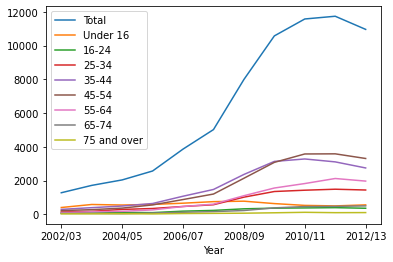

In [55]:
# untuk melihat trend dari tahun ke tahun, kita lihat secara visual
df_obes.plot()

In [57]:
# exclude kolom total
df_obes.drop(columns=["Total"], inplace=True)

<AxesSubplot:xlabel='Year'>

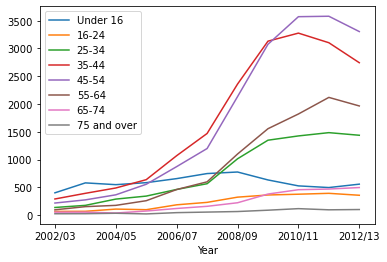

In [59]:
df_obes.plot()

dari plot di atas, kita bisa lihat kalau jumlah orang yang obesitas naik banyak di braket umur 35-54, kedua terbanyak di braket umur 25-34 dab 55-64. Sementara untuk umur lainnya, termasuk anak kecil (dibawah 16) tidak ada kenaikan jumlah penderita obesitas.

balik ke pertanyaan awal, jawabannya apakah anak kecil semakin banyak yang obesitas? adalah tidak.

<AxesSubplot:xlabel='Year'>

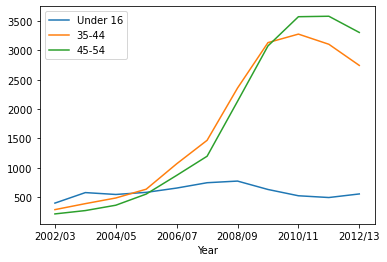

In [64]:
# coba plot beberapa kolom data saja
# Under 16	16-24	25-34	35-44	45-54	55-64	65-74	75 and over
df_obes['Under 16'].plot(legend=True)
df_obes['35-44'].plot(legend=True)
df_obes['45-54'].plot(legend=True)

In [76]:
# mpl untuk pilih style graph https://matplotlib.org/3.5.1/gallery/style_sheets/style_sheets_reference.html
mpl.style.use(['bmh'])

Text(0, 0.5, 'Jumlah Penderita Obesitas')

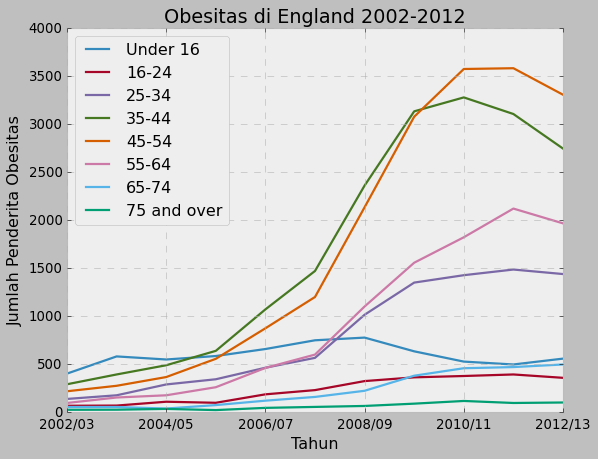

In [77]:
# plt untuk tambah text dan lain2 ke graph
df_obes.plot()
plt.title("Obesitas di England 2002-2012")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penderita Obesitas")

### latihan: import dan bersihkan data obes.xls, buat plot untuk kolom "Under 16" dan "75 and over", beri judul plot "Obesitas di England"
- file download dan simpan di folder yang sama dengan Sesi06.ipynb
- import data menggunakan pd.read_excel("nama file disini")
- saat import pastikan:
    - jika file nya ada di dalam folder, include juga nama folder nya contoh "dataset/obes.xls
    - sudah pilih sheet 7.2
    - data yang tidak diperlukan sudah di hapus (dropna)
- memilih kolom yang ingin di plot "Under 16" lalu ".plot()"
- lakukan yang sama untuk "75 and over"
- import package matplotlib yang diperlukan:
    - %matplotlib inline
    - import matplotlib.pyplot as plt
- gunakan plt.title("text disini") untuk menambah title ke plot nya

# Time Series

In [83]:
# buat dummy data tanggal dan jam pakai pandas.date_range()
# ada start, end, dan freq mirip sama range()
dates = pd.date_range(start='03-15-2022', end='03-22-2022', freq='H')

# dates
print(len(dates))

169


In [88]:
# misalkan kita punya data total pengunjung website kode.id per jam nya dari hari ini sampai minggu depan
df_vis = pd.DataFrame(dates, columns=["Date"])
df_vis['Total'] = np.random.randint(0,100, size=len(dates))
df_vis

,Date,Total
0,2022-03-15 00:00:00,46
1,2022-03-15 01:00:00,61
2,2022-03-15 02:00:00,5
3,2022-03-15 03:00:00,54
4,2022-03-15 04:00:00,29
...,...,...
164,2022-03-21 20:00:00,17
165,2022-03-21 21:00:00,6
166,2022-03-21 22:00:00,6
167,2022-03-21 23:00:00,86


In [92]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Total   169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [91]:
# jika ada kolom yang mau diubah jadi tipe data datetime, kita bisa gunakan pd.to_datetime
df_vis['Date'] = pd.to_datetime(df_vis['Date'])

In [98]:
# tipe data datetime bisa kita tarik keluar datetime tertentu: tahun, bulan, tanggal, hari, jam
df_vis['Date'].dt.weekday.value_counts()

# selain weekday, bisa gunakan year, month, day

1    25
2    24
3    24
4    24
5    24
6    24
0    24
Name: Date, dtype: int64

In [100]:
# DataFrame.set_index untuk membuat 1 kolom di DataFrame pandas jadi index nya
df_vis.set_index("Date", inplace=True)

In [101]:
df_vis

,Total
Date,
2022-03-15 00:00:00,46
2022-03-15 01:00:00,61
2022-03-15 02:00:00,5
2022-03-15 03:00:00,54
2022-03-15 04:00:00,29
...,...
2022-03-21 20:00:00,17
2022-03-21 21:00:00,6
2022-03-21 22:00:00,6


In [103]:
df_vis.index[0]

Timestamp('2022-03-15 00:00:00')

In [106]:
# kita bisa ubah format date nya jadi format lain
# coba 1 date dulu
# strptime mengubah string menjadi datetime
datetime.strptime(str('March-15-2022'), '%B-%d-%Y')

datetime.datetime(2022, 3, 15, 0, 0)

In [116]:
# strftime mengubah datetime menjadi string
# detail format tanggal bisa dilihat di https://www.w3schools.com/python/python_datetime.asp
datetime.strftime(df_vis.index[0], '%I %p, %d %B %Y')

'12 AM, 15 March 2022'

In [124]:
# Teknik Query bisa diterapkan ke tipe data datetime juga
# df_vis[df_vis['Total'] == 46]

# ambil tanggal
df_vis[df_vis.index.day == 18]

,Total
Date,
2022-03-18 00:00:00,42
2022-03-18 01:00:00,94
2022-03-18 02:00:00,90
2022-03-18 03:00:00,50
2022-03-18 04:00:00,30
2022-03-18 05:00:00,5
2022-03-18 06:00:00,11
2022-03-18 07:00:00,83
2022-03-18 08:00:00,29


In [126]:
# ambil bulan
df_vis[df_vis.index.month == 3]

,Total
Date,
2022-03-15 00:00:00,46
2022-03-15 01:00:00,61
2022-03-15 02:00:00,5
2022-03-15 03:00:00,54
2022-03-15 04:00:00,29
...,...
2022-03-21 20:00:00,17
2022-03-21 21:00:00,6
2022-03-21 22:00:00,6


In [127]:
# ambil hari tertentu
df_vis[df_vis.index.weekday == 1]

,Total
Date,
2022-03-15 00:00:00,46
2022-03-15 01:00:00,61
2022-03-15 02:00:00,5
2022-03-15 03:00:00,54
2022-03-15 04:00:00,29
2022-03-15 05:00:00,28
2022-03-15 06:00:00,64
2022-03-15 07:00:00,74
2022-03-15 08:00:00,26


In [131]:
# bisa gak digabung datanya jadi per hari
# teknik resample
df_vis.resample('D').sum()

,Total
Date,
2022-03-15,1253
2022-03-16,1087
2022-03-17,1316
2022-03-18,1096
2022-03-19,1001
2022-03-20,1334
2022-03-21,1224
2022-03-22,0


In [138]:
# selain 'D' untuk hari, bisa per tahun Y, bulan M, minggu W, jam H, dan lainnya
df_vis.resample('6H').sum()

,Total
Date,
2022-03-15 00:00:00,223
2022-03-15 06:00:00,232
2022-03-15 12:00:00,448
2022-03-15 18:00:00,350
2022-03-16 00:00:00,172
2022-03-16 06:00:00,365
2022-03-16 12:00:00,284
2022-03-16 18:00:00,266
2022-03-17 00:00:00,446


In [142]:
# beda dengan resample, ada yang namanya ROLLING SUM
df_vis['rolling_sum'] = df_vis.rolling(3).sum()
df_vis

,Total,rolling_sum
Date,,
2022-03-15 00:00:00,46,NaN
2022-03-15 01:00:00,61,NaN
2022-03-15 02:00:00,5,112.0
2022-03-15 03:00:00,54,120.0
2022-03-15 04:00:00,29,88.0
...,...,...
2022-03-21 20:00:00,17,174.0
2022-03-21 21:00:00,6,87.0
2022-03-21 22:00:00,6,29.0


In [143]:
# fillna method='backfill'
df_vis['rolling_sum'] = df_vis['rolling_sum'].fillna(method='backfill')
df_vis

,Total,rolling_sum
Date,,
2022-03-15 00:00:00,46,112.0
2022-03-15 01:00:00,61,112.0
2022-03-15 02:00:00,5,112.0
2022-03-15 03:00:00,54,120.0
2022-03-15 04:00:00,29,88.0
...,...,...
2022-03-21 20:00:00,17,174.0
2022-03-21 21:00:00,6,87.0
2022-03-21 22:00:00,6,29.0


# Analisis data Energy Germany (Timeseries)
import/download dulu data https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv

In [144]:
# import data
df_energy = pd.read_csv('dataset/opsd_germany_daily.csv')
print(df_energy.shape)
display(df_energy.head())

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [145]:
df_energy.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [146]:
# cek tipe data
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [147]:
# ubah tipe tanggal jadi tipe tanggal pakai pd.to_datetime
df_energy['Date'] = pd.to_datetime(df_energy['Date'])

In [148]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [151]:
# pastikan data di kolom Date unik semua, jumlah data unik sama dengan jumlah baris data
df_energy['Date'].nunique()

4383

In [152]:
# buat Date menjadi index
df_energy.set_index('Date', inplace=True)
df_energy

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [155]:
# kita mau explorasi data, biar lebih mudah, kita tambahkan 3 kolom baru:
# tahun, bulan, hari
df_energy['year'] = df_energy.index.year
df_energy['month'] = df_energy.index.month
df_energy['weekday'] = df_energy.index.weekday

df_energy.head()

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [156]:
# kita bisa pakai replace kalau mau ubah value di satu column
df_energy['hari'] = df_energy['weekday'].replace({0:"Senin", 1:"Selasa", 2:"Rabu", 3:"Kamis", 4:"Jumat", 5:"Sabtu", 6:"Minggu"})
df_energy

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday,hari
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6,Minggu
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0,Senin
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1,Selasa
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2,Rabu
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3,Kamis
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2,Rabu
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3,Kamis
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4,Jumat


In [159]:
# perhatikan kita bisa ambil data di tanggalan tertentu
df_energy.loc['2017'] # per tahun bisa
df_energy.loc['2017-08'] # per bulan bisa
df_energy.loc['2017-08-01':'2017-08-03'] # per hari, bbrp hari, juga bisa

,Consumption,Wind,Solar,Wind+Solar,year,month,weekday,hari
Date,,,,,,,,
2017-08-01,1364.819,100.080,159.889,259.969,2017,8,1,Selasa
2017-08-02,1365.735,103.491,165.591,269.082,2017,8,2,Rabu
2017-08-03,1389.445,402.361,120.167,522.528,2017,8,3,Kamis


<AxesSubplot:xlabel='Date'>

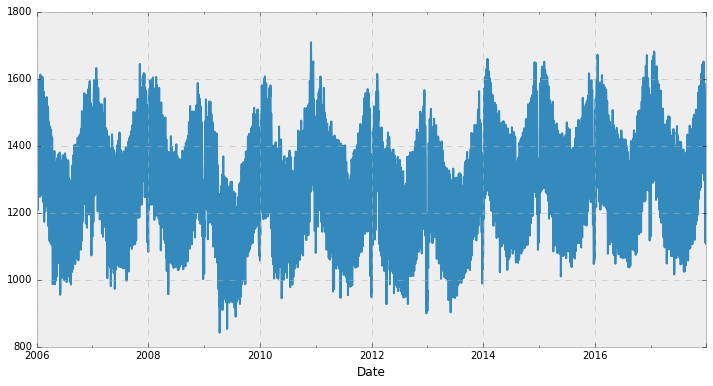

In [161]:
# untuk melihat trend pemakaian listrik di German, kita pakai bantuan visual, kita plot
# kita plot total pemakaiannya "Consumption"

# tambahkan opsi figsize=(lebar, tinggi)
df_energy['Consumption'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

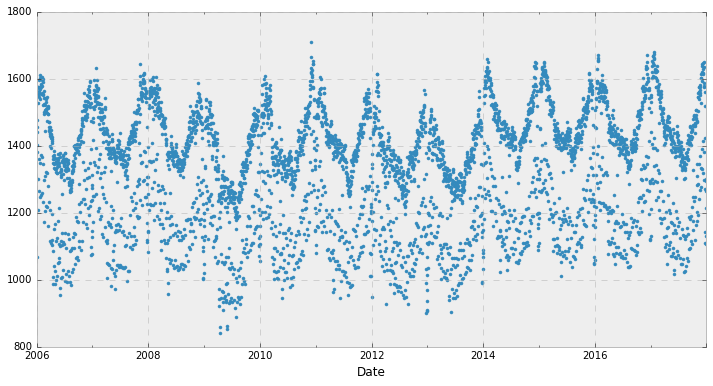

In [162]:
# data nya agak terlalu padat, kita bisa ubah sedikit pakai titik bukan pakai garis plot nya

df_energy['Consumption'].plot(figsize=(12,6), marker=".", linestyle="none")

<AxesSubplot:xlabel='Date'>

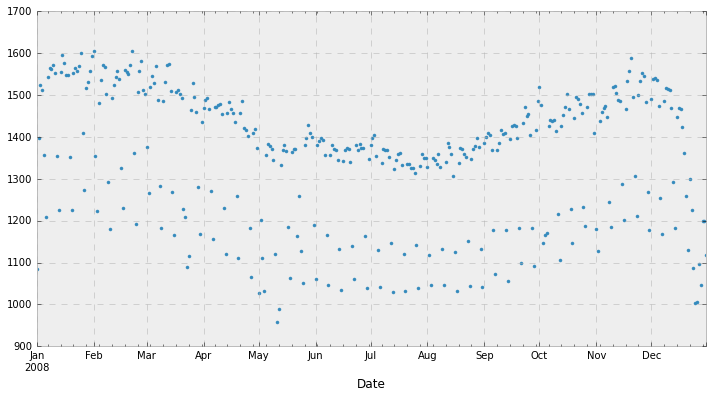

In [168]:
# kita juga bisa melihat datanya 1 tahun saja
df_energy.loc['2008','Consumption'].plot(figsize=(12,6), marker=".", linestyle="none")

pemakaian listrik di may-sep lebih rendah dibanding bulan jan-may dan sep-dec. dengan pengecualian di akhir dec ada penurunan pemakaian listrik yang sangat banyak.

<AxesSubplot:xlabel='Date'>

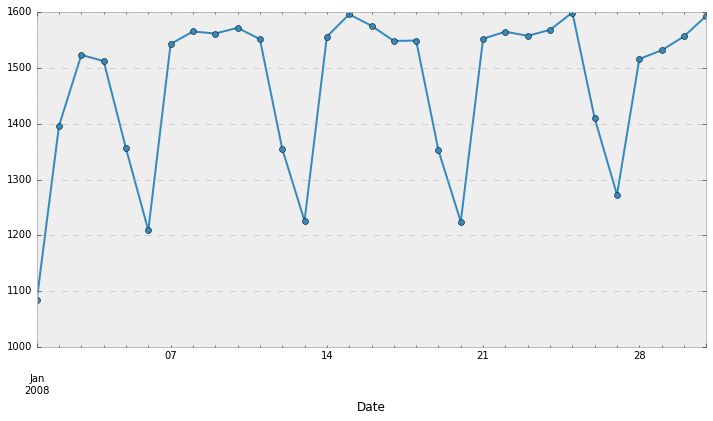

In [169]:
# satu bulan saja, pakai garisnya, titik nya diperbesar
df_energy.loc['2008-01','Consumption'].plot(figsize=(12,6), marker="o")

In [170]:
df_energy.loc['2008-01',['Consumption','hari']]

,Consumption,hari
Date,,
2008-01-01,1083.424,Selasa
2008-01-02,1396.483,Rabu
2008-01-03,1523.427,Kamis
2008-01-04,1512.429,Jumat
2008-01-05,1355.843,Sabtu
2008-01-06,1209.011,Minggu
2008-01-07,1542.984,Senin
2008-01-08,1565.447,Selasa
2008-01-09,1561.768,Rabu


pemakaian listrik pas weekend (sabtu minggu) dan hari libur lebih rendah dibanding pemakaian listrik hari kerja.

<AxesSubplot:xlabel='Date'>

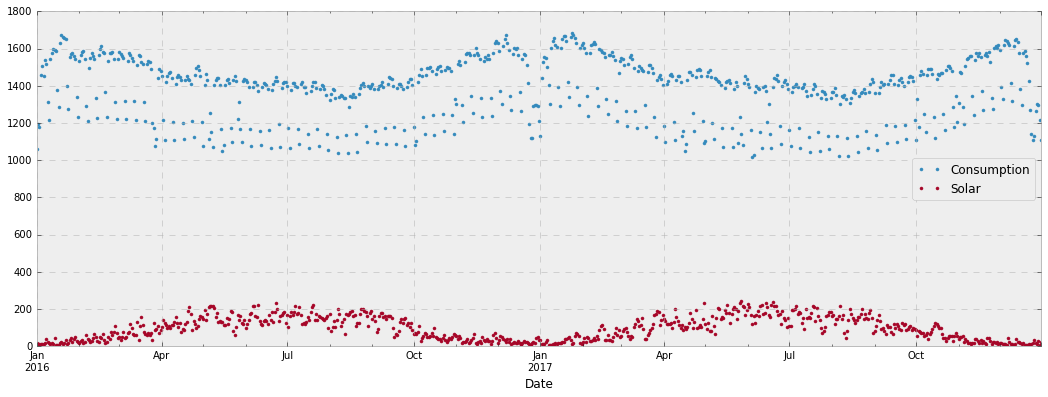

In [181]:
# selain pemakaian listrik total, kita bisa cari tau trend pemakaian Solar (tenaga surya) dan angin mereka juga
df_energy.loc['2016':'2017',['Consumption', 'Solar']].plot(figsize=(18,6), marker=".", linestyle="none")

pemakaian tenaga surya semakin banyak saat musim panas, terutama di bulan July

<AxesSubplot:xlabel='Date'>

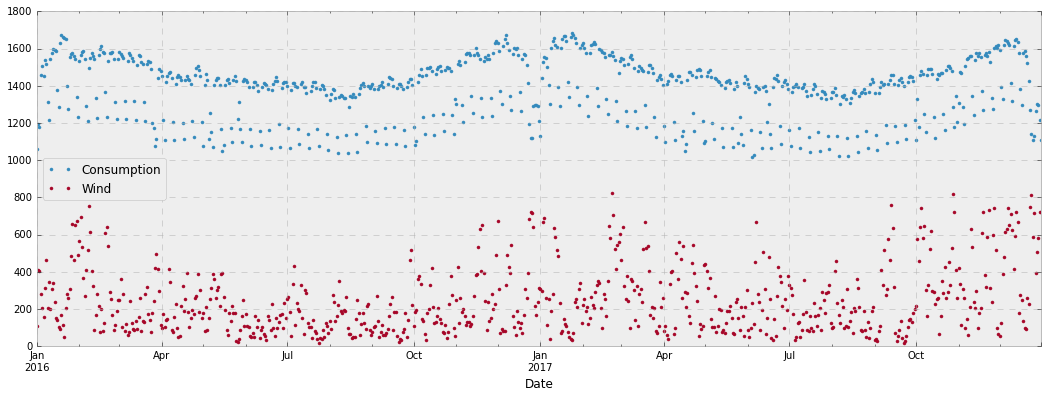

In [182]:
# cek tenaga angin
df_energy.loc['2016':'2017',['Consumption', 'Wind']].plot(figsize=(18,6), marker=".", linestyle="none")

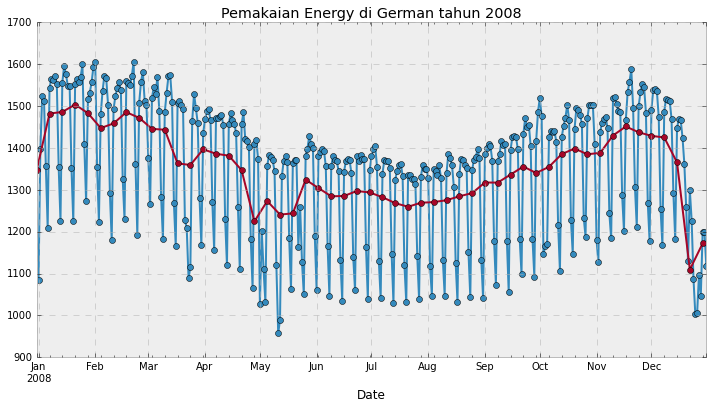

In [193]:
# kita juga bisa bandingkan penggunaan energy nya setelah di resample per minggu
df_energy.loc['2008','Consumption'].plot(figsize=(12,6), marker="o")
df_energy.loc['2008','Consumption'].resample("W").mean().plot(figsize=(12,6), marker="o")

plt.title("Pemakaian Energy di German tahun 2008")
plt.savefig("german_energy_2008.png") # untuk save hasil plot ke file, kita pakai savefig